In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url, index_col=0)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


## TASK4

<AxesSubplot:ylabel='MEDV'>

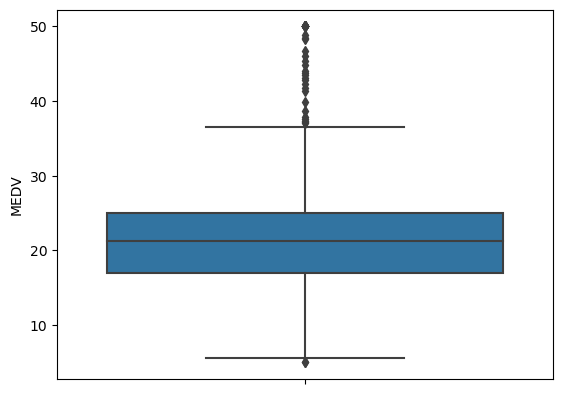

In [7]:
#For the "Median value of owner-occupied homes" provide a boxplot
sns.boxplot( y='MEDV', data=boston_df)

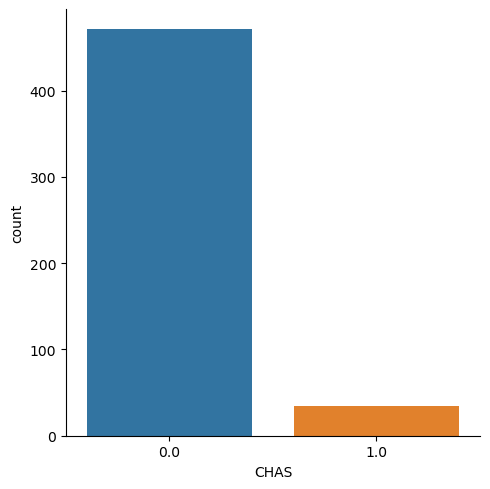

In [9]:
#Provide a  bar plot for the Charles river variable
sns.catplot(x='CHAS', kind='count', data=boston_df)

In [31]:
boston_df[boston_df['AGE']>35]['age_group']

0      35 and 70
1             70
2      35 and 70
3      35 and 70
4      35 and 70
         ...    
501    35 and 70
502           70
503           70
504           70
505           70
Name: age_group, Length: 415, dtype: object

In [29]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

#Split the age  with .loc as the sql syntax 
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = '35 and 70'
boston_df.loc[(boston_df['AGE'] >=70), 'age_group'] = '70'


<AxesSubplot:xlabel='age_group', ylabel='MEDV'>

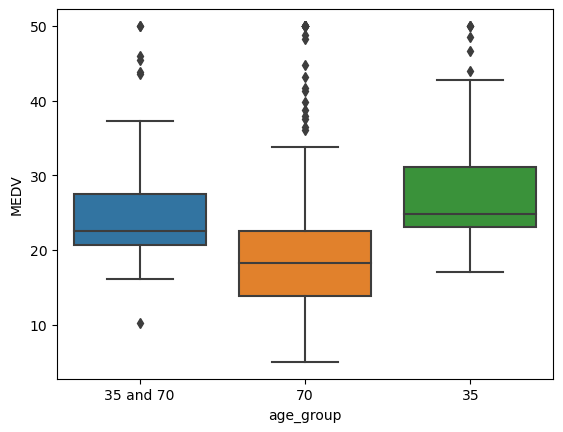

In [33]:
sns.boxplot(x='age_group', y='MEDV', data=boston_df)

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

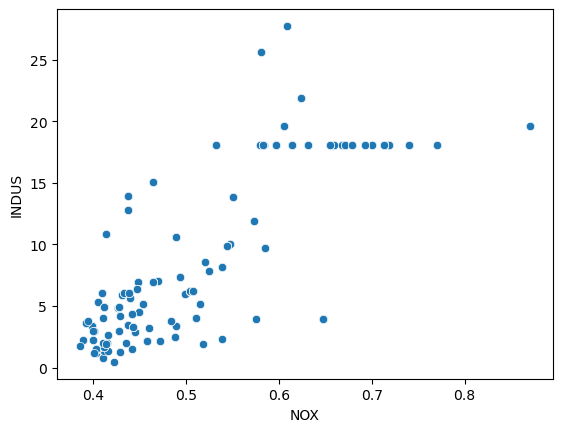

In [34]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
sns.scatterplot(x='NOX', y='INDUS',  data=boston_df)

<AxesSubplot:xlabel='PTRATIO', ylabel='Density'>

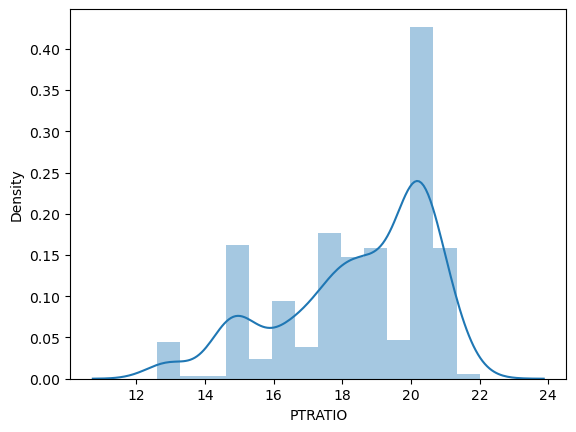

In [36]:
#Create a histogram for the pupil to teacher ratio variable
#PTRATIO
sns.distplot(boston_df['PTRATIO'], kde = True)

## TASK 5

In [40]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? 
#(T-test for independent samples)

##First we verify that the variances are statiscally equal. 

scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

Due to the p_value of levene test is lesser than 0.05, we refuse the null hypothesis. And the variances are not statiscally equal. 

In [41]:
##We applu a t-test with different variances
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

We refuse the null hypothesis, then the medians are differents. 

In [42]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 
#(ANOVA)

#First, we check if the variances are statiscally equal. 

scipy.stats.levene(boston_df[boston_df['age_group'] == '35']['MEDV'],
                   boston_df[boston_df['age_group'] == '35 and 70']['MEDV'],
                   boston_df[boston_df['age_group'] == '70']['MEDV'], center='mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

In [43]:
## p value>0.05, then we dont refuse the null hyptohesis. The variances are statiscally equal. 
lower_35=boston_df[boston_df['age_group'] == '35']['MEDV']
between_35_70= boston_df[boston_df['age_group'] == '35 and 70']['MEDV']
greater_70=boston_df[boston_df['age_group'] == '70']['MEDV']


In [45]:
#Now we focuse in the difference in their means with a F test (or one way-Anova test)
f_statistic, p_value = scipy.stats.f_oneway(lower_35, between_35_70, greater_70)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [46]:
##Conclusion: P-value<0.05, then the means are differents. 

In [47]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 
#(Pearson Correlation)

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209149, pvalue=7.913361061240043e-98)

In [48]:
#Conclusion: Since the p-valu<0.05, we reject the null hypothesis and there exists a relation between nitric oxide concetrations and the proportion

In [ ]:
##What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? 
##(Regression analysis)

<AxesSubplot:xlabel='DIS', ylabel='MEDV'>

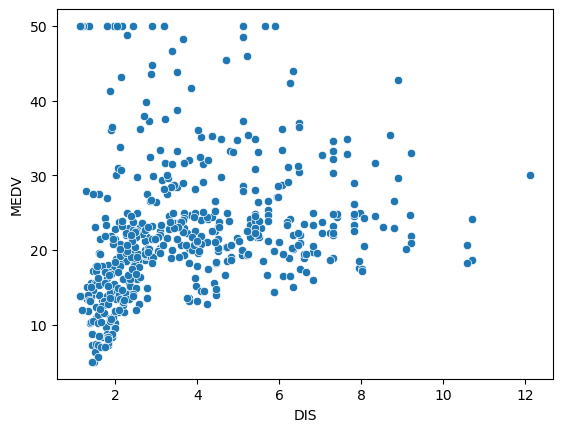

In [54]:
#weighted distances to five Boston employment centres
DIS=boston_df['DIS']
##MEDV - Median value of owner-occupied homes in $1000's
MEDV=boston_df['MEDV']
#plot
sns.scatterplot(x='DIS', y='MEDV',  data=boston_df)

In [55]:
## add an intercept (beta_0) to our model
X = sm.add_constant(DIS) 

model = sm.OLS(MEDV, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           1.21e-08
Time:                        11:33:37   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
##We conclude that the impact is 1.0916 median-value of owner-occupied homes per weighted distances 